In [3]:
import numpy as np
import keras

from keras.applications import mobilenetv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
classes = !ls data/train

In [45]:
num_classes = len(classes)

In [50]:
from keras.models import Sequential
from keras.layers import Activation, Dense

In [52]:
model = Sequential()
model.add(mobilenetv2.MobileNetV2(weights='imagenet'))
model.add(Dense(units=num_classes, activation='softmax'))

In [53]:
model.layers[0].trainable = True

In [54]:
from keras.optimizers import Adam

In [55]:
model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=0.0001),
                metrics=['accuracy'])

In [57]:
from keras.preprocessing.image import ImageDataGenerator

In [60]:
generator = ImageDataGenerator(preprocessing_function=mobilenetv2.preprocess_input)

In [61]:
train_dataset = generator.flow_from_directory(
                "data/train",
                target_size = (224, 224),
                batch_size = 32,
                class_mode = 'categorical')

Found 37836 images belonging to 75 classes.


In [62]:
val_dataset = generator.flow_from_directory(
              "data/test",
              target_size = (224, 224),
              class_mode = 'categorical')

Found 12709 images belonging to 75 classes.


In [64]:
model.fit_generator(train_dataset,
                    steps_per_epoch = 37836 // 32,
                    epochs = 5,
                    validation_data = val_dataset,
                    validation_steps = 1)

Epoch 1/5
1182/1182 [==============================] - 1406s 1s/step - loss: 4.1722 - acc: 0.6108 - val_loss: 4.0857 - val_acc: 0.6250
Epoch 2/5
1182/1182 [==============================] - 1417s 1s/step - loss: 4.0021 - acc: 0.6604 - val_loss: 3.9395 - val_acc: 0.5625
Epoch 3/5
1182/1182 [==============================] - 1417s 1s/step - loss: 3.8396 - acc: 0.6564 - val_loss: 3.7600 - val_acc: 0.6250
Epoch 4/5
 371/1182 [========>.....................] - ETA: 16:11 - loss: 3.7327 - acc: 0.6547

KeyboardInterrupt: 

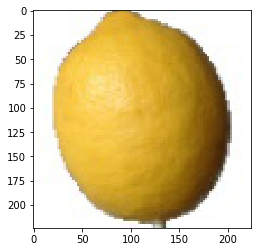

In [65]:
img = img_to_array(load_img('data/train/Lemon/101_100.jpg', target_size=(224, 224)))
plt.imshow(np.uint8(img))
plt.show()

In [66]:
img_b = np.expand_dims(img, axis=0)
img_p = mobilenetv2.preprocess_input(img_b.copy())

In [67]:
predictions = model.predict(img_p)

In [70]:
classes[np.argmax(predictions)]

'Lemon'